Epoch 1/20, Loss: 2.5544
Epoch 2/20, Loss: 2.3779
Epoch 3/20, Loss: 2.2392
Epoch 4/20, Loss: 2.1190
Epoch 5/20, Loss: 2.0095
Epoch 6/20, Loss: 1.9073
Epoch 7/20, Loss: 1.8079
Epoch 8/20, Loss: 1.7088
Epoch 9/20, Loss: 1.6080
Epoch 10/20, Loss: 1.5060
Epoch 11/20, Loss: 1.4043
Epoch 12/20, Loss: 1.3036
Epoch 13/20, Loss: 1.2054
Epoch 14/20, Loss: 1.1104
Epoch 15/20, Loss: 1.0192
Epoch 16/20, Loss: 0.9323
Epoch 17/20, Loss: 0.8502
Epoch 18/20, Loss: 0.7741
Epoch 19/20, Loss: 0.7042
Epoch 20/20, Loss: 0.6406
Test Accuracy: 0.9111
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.73      0.79      0.76        28
           2       0.92      1.00      0.96        33
           3       1.00      0.91      0.95        34
           4       0.98      1.00      0.99        46
           5       0.95      0.89      0.92        47
           6       0.97      0.94      0.96        35
           7       0.94      0.97 

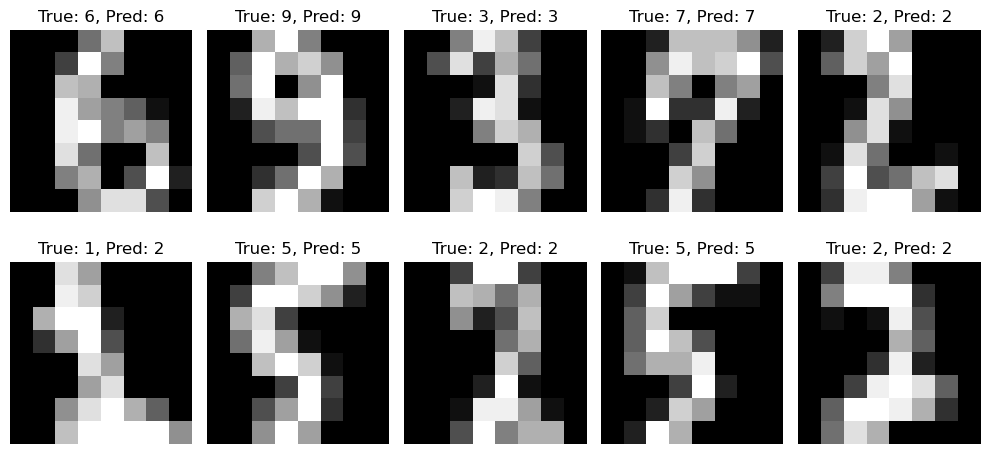

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # (n_samples, 64)
targets = digits.target

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# 넘파이를 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)  # 클래스 수는 0~9까지 10개
        )

    def forward(self, x):
        return self.model(x)

model = DNN()

# 3. 손실 함수와 최적화기 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 5. 평가
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")
    print(metrics.classification_report(y_test_tensor, predicted))

# 6. 시각화 (정답 vs 예측 예시)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {predicted[i].item()}")
    ax.axis('off')
plt.tight_layout()
plt.show()
